In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

custom_filter = '["highway"~"primary|secondary|tertiary"]'

G = ox.graph.graph_from_place(
    "belo horizonte - MG", custom_filter=custom_filter, network_type="walk"
)

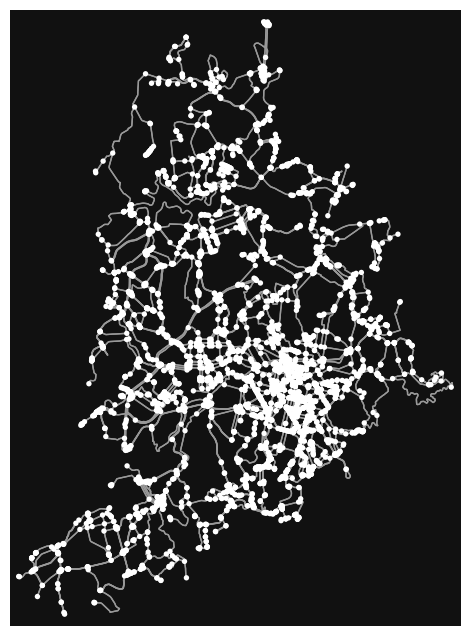

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [32]:
ox.plot_graph(G)

In [33]:
gdf = ox.geocoder.geocode_to_gdf("belo horizonte - MG")
geometry = gdf.geometry.iloc[0]
features = ox.features.features_from_polygon(geometry, {"amenity": "bar"})
features

geometry  \
element id                                                               
node    319258499                          POINT (-43.91986 -19.93889)   
        338835579                          POINT (-43.92397 -19.93198)   
        560387242                           POINT (-43.9353 -19.91657)   
        560387248                          POINT (-43.93581 -19.91645)   
        700201180                          POINT (-43.97463 -19.84224)   
...                                                                ...   
        12803223360                        POINT (-43.96135 -19.84282)   
way     126248819    POLYGON ((-43.94166 -19.94554, -43.9415 -19.94...   
        219413190    POLYGON ((-43.97116 -19.86276, -43.97116 -19.8...   
        320045046    POLYGON ((-43.92765 -19.88625, -43.92748 -19.8...   
        1329974422   POLYGON ((-43.94288 -19.92992, -43.94279 -19.9...   

                    amenity                             name  historic  \
element id                                                               
node    319258499       bar                   Bar do Salomão       NaN   
        338835579       bar                      Villa Rizza       NaN   
        560387242       bar                              NaN       NaN   
        560387248       bar                              NaN  monument   
        700201180       bar                              NaN       NaN   
...                     ...                              ...       ...   
        12803223360     bar  Bar e Restaurante Seu Braz 1949       NaN   
way     126248819       bar                  Morrito do Mato       NaN   
        219413190       bar                              NaN       NaN   
        320045046       bar                       Druida Mix       NaN   
        1329974422      bar                           Zavino       NaN   

                          addr:city addr:country addr:housenumber  \
element id                                                          
node    319258499               NaN          NaN              NaN   
        338835579               NaN          NaN              NaN   
        560387242               NaN          NaN              NaN   
        560387248               NaN          NaN              NaN   
        700201180               NaN          NaN              NaN   
...                             ...          ...              ...   
        12803223360  Belo Horizonte          NaN             4325   
way     126248819               NaN          NaN              NaN   
        219413190               NaN          NaN              NaN   
        320045046               NaN          NaN              NaN   
        1329974422   Belo Horizonte          NaN              NaN   

                          addr:street cuisine wheelchair  ... level min_age  \
element id                                                ...                 
node    319258499                 NaN     NaN        NaN  ...   NaN     NaN   
        338835579                 NaN     NaN        NaN  ...   NaN     NaN   
        560387242                 NaN     NaN        NaN  ...   NaN     NaN   
        560387248                 NaN     NaN        NaN  ...   NaN     NaN   
        700201180                 NaN     NaN        NaN  ...   NaN     NaN   
...                               ...     ...        ...  ...   ...     ...   
        12803223360  Avenida Portugal     NaN         no  ...     1     NaN   
way     126248819                 NaN     NaN        NaN  ...   NaN     NaN   
        219413190                 NaN     NaN        NaN  ...   NaN     NaN   
        320045046                 NaN     NaN        NaN  ...   NaN     NaN   
        1329974422      Rua São Paulo     NaN        NaN  ...   NaN     NaN   

                    air_conditioning description lgbtq indoor_seating toilets  \
element id                                                                      
node    319258499                NaN         NaN

In [34]:
feature_points = features.representative_point()
nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)
nn

array([   33024422,    35789387,  2827403346,  2827403346,  1834632774,
        2843901301,    27564555,    33024422,    76008347,    28800979,
        2066691721,   585680695,  8917568375,  2835653986,  4270893846,
        5471850996,   335585588,    75429526,    29096253,    27591785,
          29096745,    29096745,    27563813,  1469991199,  1469991199,
          98851989,  5573749035,  8902062164,  8156857620,    75601513,
         320407457,    76009190,    29096202,    60592916,    76007160,
          76007160,    60592914,    60592912,    60592914,   320943759,
          28405057,    76481428,  2285761081,   335352453,  2827399846,
          32449511,    60592914,    41416532,    29287934,    28109270,
          35930990,    29095105,  9474391895,    33024422,    29601744,
        2902144401,    76007160,    34992666,    31736775,    61137322,
        3108083292,  8908436160,    64907484,    29850046,  1469991199,
          76481428,   320407430,    29095219,   317957889,    63

In [35]:
useful_tags = ["geometry", "name"]
for node, feature in zip(nn, features[useful_tags].to_dict(orient="records")):
    feature = {k: v for k, v in feature.items() if pd.notna(v)}
    G.nodes[node].update({"bar": feature})

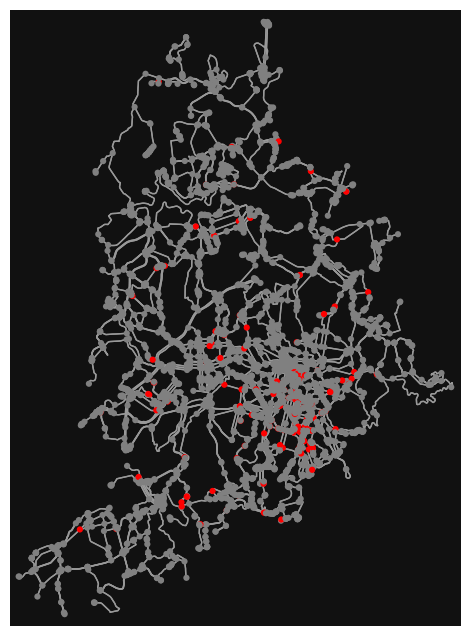

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [36]:
node_colors = ["red" if "bar" in data else "gray" for _, data in G.nodes(data=True)]
ox.plot_graph(G, node_color=node_colors, node_size=20)

In [38]:
bar_name = "Morrito do Mato"
bar_node = None

for node, data in G.nodes(data=True):
    if "bar" in data and data["bar"].get("name") == bar_name:
        bar_node = node
        break

if bar_node is not None:
    print(f"Node with bar '{bar_name}' found: {bar_node}")
else:
    print(f"No bar with the name '{bar_name}' found.")

Node with bar 'Morrito do Mato' found: 76007160


In [28]:
bar_name = "Druida Mix"
bar_node = None

for node, data in G.nodes(data=True):
    if "bar" in data and data["bar"].get("name") == bar_name:
        bar_node = node
        break

if bar_node is not None:
    print(f"Node with bar '{bar_name}' found: {bar_node}")
else:
    print(f"No bar with the name '{bar_name}' found.")

Node with bar 'Druida Mix' found: 5273004583


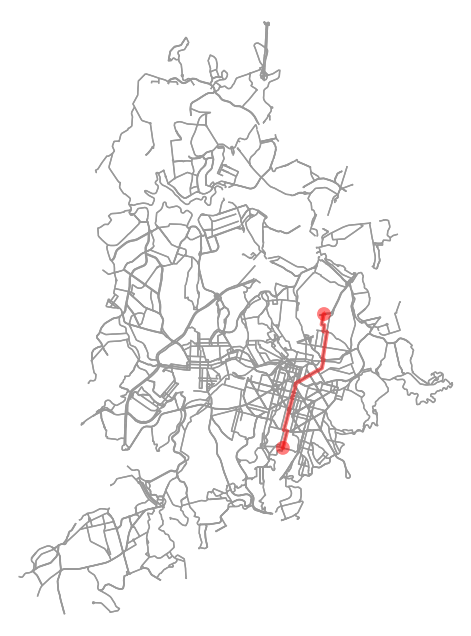

In [37]:
node_x = 76007160  # Replace with the ID of your starting node
node_y = 5273004583  # Replace with the ID of your destination node

# Calculate the shortest path based on distance
shortest_path = ox.shortest_path(G, orig=node_x, dest=node_y, weight="length")

# Plot the shortest path
fig, ax = ox.plot_graph_route(
    G, shortest_path, route_linewidth=3, node_size=0, bgcolor="white"
)

In [40]:
from huggingface_hub import login

login()